In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mousedf = pd.read_csv(mouse_drug_data_to_load)
clinicaldf = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset


# Display the data table for preview



In [3]:
mousedf.head(15)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [4]:
clinicaldf.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [44]:
mergedf = clinicaldf.merge(mousedf, on = 'Mouse ID')

In [45]:
mergedf.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [37]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumordf = pd.DataFrame(mergedf.groupby(['Drug', 'Timepoint']).mean())
# Convert to DataFrame
meantumordf = meantumordf.drop(columns=["Metastatic Sites"])
meantumordf = meantumordf.reset_index()
# Preview DataFrame
meantumordf.head(25)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [47]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semtumordf = pd.DataFrame(mergedf.groupby(['Drug', 'Timepoint']).sem())
# Convert to DataFrame

# Preview DataFrame
#use sem function
#same as mean
#why is it coming out NaN


In [50]:
mergedf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [51]:
semtumordf

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
          25                 0.181818       NaN            0.881642
          30                 0.172944       NaN            0.934460
          35                 0.169496       NaN            1.052241
          40                 0.175610       NaN            1.223608
          45                 0.202591       NaN            1.223977
Ceftamin  0                  0.000000       NaN            0.000000
          5                  0.108588       NaN            0.164505
          10                 0.152177       NaN            0.236144
          15                 0.180625       NaN            0.332053
          20                 0.241034       NaN            0.359482
          25                 0.258831       NaN            0.439356
          30                 0.249479       NaN            0.490620
          35                 0.266526       NaN            0.692248
          40                 0.289128       NaN            0.708505
          45                 0.286101       NaN            0.902358
Infubinol 0                  0.000000       NaN            0.000000
          5                  0.091652       NaN            0.235102
          10                 0.159364       NaN            0.282346
          15                 0.194015       NaN            0.357705
          20                 0.234801       NaN            0.476210
          25                 0.265753       NaN            0.550315
          30                 0.227823       NaN            0.631061
          35                 0.224733       NaN            0.984155
          40                 0.314466       NaN            1.055220
          45                 0.309320       NaN            1.144427
...                               ...       ...                 ...
Ramicane  0                  0.000000       NaN            0.000000
          5                  0.066332       NaN            0.482955
          10                 0.090289       NaN            0.720225
          15                 0.115261       NaN            0.770432
          20                 0.119430       NaN            0.786199
          25                 0.119430       NaN            0.746991
          30                 0.139968       NaN            0.864906
          35                 0.145997       NaN            0.967433
          40                 0.160591       NaN            1.128445
          45                 0.190221       NaN            1.226805
Stelasyn  0                  0.000000       NaN            0.000000
          5                  0.087178       NaN            0.239862
          10                 0.123672       NaN            0.433678
          15                 0.153439       NaN            0.493261
          20                 0.200905       NaN            0.621889
          25                 0.219824       NaN            0.741922
          30                 0.230641       NaN            0.899548
          35                 0.240983       NaN            1.003186
          40                 0.312815       NaN            1.410435
          45                 0.359062       NaN            1.576556
Zoniferol 0                  0.000000       NaN            0.000000
          5                  0.077709       NaN            0.188950
          10                 0.109109       NaN            0.263949
          15                 0.111677       NaN            0.370544
          20                 0.166378       NaN            0.533182
          25                 0.236621       NaN            0.602513
         

In [52]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
meantumordf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [81]:
meantumordfpivot = meantumordf.pivot(index='Timepoint',columns='Drug') 

In [90]:
meantumordfpivot

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [89]:

meantumordfpivot = meantumordfpivot.loc(meantumordfpivot['Capomulin','Infubinol','Ketapril','Placebo'])

KeyError: 'Key length (4) exceeds index depth (2)'

In [4]:
##

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [63]:
meantumordfpivot.index.values

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

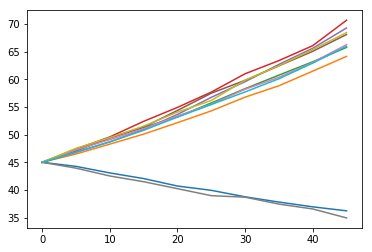

In [85]:
# Generate the Plot (with Error Bars)
x_axis = meantumordfpivot.index.values
plt.plot(x_axis, meantumordfpivot)

#plt.errorbar(y_axis, semtumordf)
#plt.errorbar(y_axis, meantumordfpivot)
# Save the Figure


In [75]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [77]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanmetadf = pd.DataFrame(mergedf.groupby(['Drug', 'Timepoint']).mean())
# Convert to DataFrame

# Preview DataFrame
meanmetadf

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308
Infubinol 0                   45.000000          0.000000
          5                   47.062001          0.280000
          10                  49.403909          0.666667
          15                  51.296397          0.904762
          20                  53.197691          1.050000
          25                  55.715252          1.277778
          30                  58.299397          1.588235
          35                  60.742461          1.666667
          40                  63.162824          2.100000
          45                  65.755562          2.111111
...                                 ...               ...
Ramicane  0                   45.000000          0.000000
          5                   43.944859          0.120000
          10                  42.531957          0.250000
          15                  41.495061          0.333333
          20                  40.238325          0.347826
          25                  38.974300          0.652174
          30                  38.703137          0.782609
          35                  37.451996          0.952381
          40                  36.574081          1.100000
          45                  34.955595          1.250000
Stelasyn  0                   45.000000          0.000000
          5                   47.527452          0.240000
          10                  49.463844          0.478261
          15                  51.529409          0.782609
          20                  54.067395          0.952381
          25                  56.166123          1.157895
          30                  59.826738          1.388889
          35                  62.440699          1.562500
          40                  65.356386          1.583333
          45                  68.438310          1.727273
Zoniferol 0                   45.000000          0.000000
          5                   46.851818          0.166667
          10                  48.689881          0.500000
          15                  50.779059          0.809524
          20                  53.170334          1.294118
          25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [79]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semmetadf = pd.DataFrame(mergedf.groupby(['Drug', 'Timepoint']).sem())
# Convert to DataFrame

# Preview DataFrame
semmetadf

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
          25                 0.181818       NaN            0.881642
          30                 0.172944       NaN            0.934460
          35                 0.169496       NaN            1.052241
          40                 0.175610       NaN            1.223608
          45                 0.202591       NaN            1.223977
Ceftamin  0                  0.000000       NaN            0.000000
          5                  0.108588       NaN            0.164505
          10                 0.152177       NaN            0.236144
          15                 0.180625       NaN            0.332053
          20                 0.241034       NaN            0.359482
          25                 0.258831       NaN            0.439356
          30                 0.249479       NaN            0.490620
          35                 0.266526       NaN            0.692248
          40                 0.289128       NaN            0.708505
          45                 0.286101       NaN            0.902358
Infubinol 0                  0.000000       NaN            0.000000
          5                  0.091652       NaN            0.235102
          10                 0.159364       NaN            0.282346
          15                 0.194015       NaN            0.357705
          20                 0.234801       NaN            0.476210
          25                 0.265753       NaN            0.550315
          30                 0.227823       NaN            0.631061
          35                 0.224733       NaN            0.984155
          40                 0.314466       NaN            1.055220
          45                 0.309320       NaN            1.144427
...                               ...       ...                 ...
Ramicane  0                  0.000000       NaN            0.000000
          5                  0.066332       NaN            0.482955
          10                 0.090289       NaN            0.720225
          15                 0.115261       NaN            0.770432
          20                 0.119430       NaN            0.786199
          25                 0.119430       NaN            0.746991
          30                 0.139968       NaN            0.864906
          35                 0.145997       NaN            0.967433
          40                 0.160591       NaN            1.128445
          45                 0.190221       NaN            1.226805
Stelasyn  0                  0.000000       NaN            0.000000
          5                  0.087178       NaN            0.239862
          10                 0.123672       NaN            0.433678
          15                 0.153439       NaN            0.493261
          20                 0.200905       NaN            0.621889
          25                 0.219824       NaN            0.741922
          30                 0.230641       NaN            0.899548
          35                 0.240983       NaN            1.003186
          40                 0.312815       NaN            1.410435
          45                 0.359062       NaN            1.576556
Zoniferol 0                  0.000000       NaN            0.000000
          5                  0.077709       NaN            0.188950
          10                 0.109109       NaN            0.263949
          15                 0.111677       NaN            0.370544
          20                 0.166378       NaN            0.533182
          25                 0.236621       NaN            0.602513
         

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)